In [1]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras  
import pandas as pd

In [2]:
dataset = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset1 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos


In [3]:
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

dataset1.replace([np.inf, -np.inf], -1, inplace=True) 
dataset1.replace([np.nan, -np.nan], -1, inplace=True)

In [4]:
# Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)
dataset1 = dataset1.drop(dataset1[dataset1['Dst Port']=='Dst Port'].index)

#Eliminamos las columnas innecesarias

dataset = dataset.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min'], axis=1)
dataset1 = dataset1.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset1 = dataset1.drop(['Timestamp'], axis=1)
dataset = dataset.drop(['Timestamp'], axis=1)

#Eliminamos la columna 
dataset

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,3025021,11,15,336.0,188.0,79.0,0.0,30.545455,38.624768,...,6,0,0,0,0,1.641321e+15,9.194970e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
1,6,468,2,1,79.0,0.0,79.0,0.0,39.500000,55.861436,...,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,FTP-BruteForce
2,6,3054906,13,15,338.0,188.0,79.0,0.0,26.000000,36.398260,...,6,0,0,0,0,1.641321e+15,9.113864e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
3,6,3046116,11,15,341.0,188.0,79.0,0.0,31.000000,38.348403,...,6,0,0,0,0,1.641321e+15,9.216062e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
4,6,3045413,13,15,351.0,188.0,86.0,0.0,27.000000,37.678464,...,6,0,0,0,0,1.641321e+15,9.112821e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430151,17,9264,1,1,47.0,63.0,47.0,47.0,47.000000,0.000000,...,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign
430152,0,91444297,51,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,1.614000e+15,2.329123e+14,1.646939e+15,2.016173e+07,Benign
430153,17,101164777,6,6,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,5,0,0,0,0,1.646939e+15,3.197853e+07,1.646939e+15,1.646939e+15,Benign
430154,17,101009912,6,6,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,5,0,0,0,0,1.646939e+15,3.191661e+07,1.646939e+15,1.646939e+15,Benign


In [5]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)
        
n=0
for column in dataset1:
    column
    if column != 'Label':
        dataset1[column] = dataset1[column].astype(float)


In [6]:
#dataset.loc[(dataset.Label != 'Benign'),'Label']='Evil'
#dataset1.loc[(dataset1.Label != 'Benign'),'Label']='Evil'
# Solo se utiliza para detectar malo o bueno

#dataset = dataset.drop(dataset[dataset['Label'] == 'Evil'].sample(frac=.8).index)
#dataset1 = dataset1.drop(dataset1[dataset1['Label'] == 'Evil'].sample(frac=.8).index)

dataset

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6.0,3025021.0,11.0,15.0,336.0,188.0,79.0,0.0,30.545455,38.624768,...,6.0,0.0,0.0,0.0,0.0,1.641321e+15,9.194970e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
1,6.0,468.0,2.0,1.0,79.0,0.0,79.0,0.0,39.500000,55.861436,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,FTP-BruteForce
2,6.0,3054906.0,13.0,15.0,338.0,188.0,79.0,0.0,26.000000,36.398260,...,6.0,0.0,0.0,0.0,0.0,1.641321e+15,9.113864e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
3,6.0,3046116.0,11.0,15.0,341.0,188.0,79.0,0.0,31.000000,38.348403,...,6.0,0.0,0.0,0.0,0.0,1.641321e+15,9.216062e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
4,6.0,3045413.0,13.0,15.0,351.0,188.0,86.0,0.0,27.000000,37.678464,...,6.0,0.0,0.0,0.0,0.0,1.641321e+15,9.112821e+05,1.641321e+15,1.641321e+15,FTP-BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430151,17.0,9264.0,1.0,1.0,47.0,63.0,47.0,47.0,47.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign
430152,0.0,91444297.0,51.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.614000e+15,2.329123e+14,1.646939e+15,2.016173e+07,Benign
430153,17.0,101164777.0,6.0,6.0,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,5.0,0.0,0.0,0.0,0.0,1.646939e+15,3.197853e+07,1.646939e+15,1.646939e+15,Benign
430154,17.0,101009912.0,6.0,6.0,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,5.0,0.0,0.0,0.0,0.0,1.646939e+15,3.191661e+07,1.646939e+15,1.646939e+15,Benign


In [7]:
Labels = dataset['Label'].unique()
Y_train = dataset["Label"]
Y_test =  dataset1["Label"]

In [8]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

X_train=dataset.iloc[:, 0:76] #Luego obtenemos las características del flujo
X_test=dataset1.iloc[:, 0:76]



features = list(X_train.columns)

#plt.savefig('line_plot.svg') 
#pintar solo con colores

In [9]:
from sklearn.preprocessing import LabelEncoder
 
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train) #para pasar a numeros


Labels = lb_make.inverse_transform(Y_train)
Labels = list(lb_make.classes_)
Labels

['Benign',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'FTP-BruteForce',
 'SSH-Bruteforce']

In [10]:
Y_train
unique, counts = np.unique(Y_train, return_counts=True)
counts

array([121679,  52179,  50689,  53850,  53877,  50894,  46988],
      dtype=int64)

In [11]:
unique

array([0, 1, 2, 3, 4, 5, 6])

In [12]:
lb_make = LabelEncoder()
Y_test = lb_make.fit_transform(Y_test)

Labels1 = lb_make.inverse_transform(Y_test)
Labels1 = list(lb_make.classes_)
Labels1
Y_test

array([5, 5, 5, ..., 0, 0, 0])

In [13]:
dataset["Label"].value_counts()

Benign                      121679
DoS attacks-Slowloris        53877
DoS attacks-SlowHTTPTest     53850
DoS attacks-GoldenEye        52179
FTP-BruteForce               50894
DoS attacks-Hulk             50689
SSH-Bruteforce               46988
Name: Label, dtype: int64

In [14]:
unique, counts = np.unique(Y_test, return_counts=True)
counts

array([32391, 10022, 10257, 11110, 11109, 15138, 11965], dtype=int64)

In [15]:
dataset1["Label"].value_counts()

Benign                      32391
FTP-BruteForce              15138
SSH-Bruteforce              11965
DoS attacks-SlowHTTPTest    11110
DoS attacks-Slowloris       11109
DoS attacks-Hulk            10257
DoS attacks-GoldenEye       10022
Name: Label, dtype: int64

In [16]:
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

#scaler = MinMaxScaler().fit(X_train) # Normalizamos los datos
#trainX = scaler.transform(X_train) # Asi se representan los datos

#testT = scaler.transform(X_test)


In [18]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,12),activation='relu', max_iter=500,random_state=0)
)

In [19]:
import time
X_trainArr=X_train.to_numpy()
Y_train

inicio = time.time()
model.fit(X_trainArr,Y_train)
fin = time.time()
print(fin-inicio)

794.5890514850616


In [20]:
# evaluate the model Entrenamiento

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_trainArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr

y_test1_text = []
for i in range(0, Y_train.size):
    for j in range(0, LabelsArr.size):
        if Y_train[i] == j:
            y_test1_text.append(Labels[j])

y_pred_text = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_pred_text.append(Labels[j])
            


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

                          precision    recall  f1-score   support

                  Benign  0.99588240 0.99185562 0.99386493    121679
   DoS attacks-GoldenEye  0.98486142 0.97249851 0.97864093     52179
        DoS attacks-Hulk  0.87753538 0.97131528 0.92204691     50689
DoS attacks-SlowHTTPTest  0.99285929 0.92178273 0.95600173     53850
   DoS attacks-Slowloris  0.99640201 0.99717876 0.99679023     53877
          FTP-BruteForce  0.97806514 0.98826974 0.98314096     50894
          SSH-Bruteforce  0.99963043 0.97861156 0.98900933     46988

                accuracy                      0.97711063    430156
               macro avg  0.97503372 0.97450174 0.97421358    430156
            weighted avg  0.97858766 0.97711063 0.97738248    430156



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

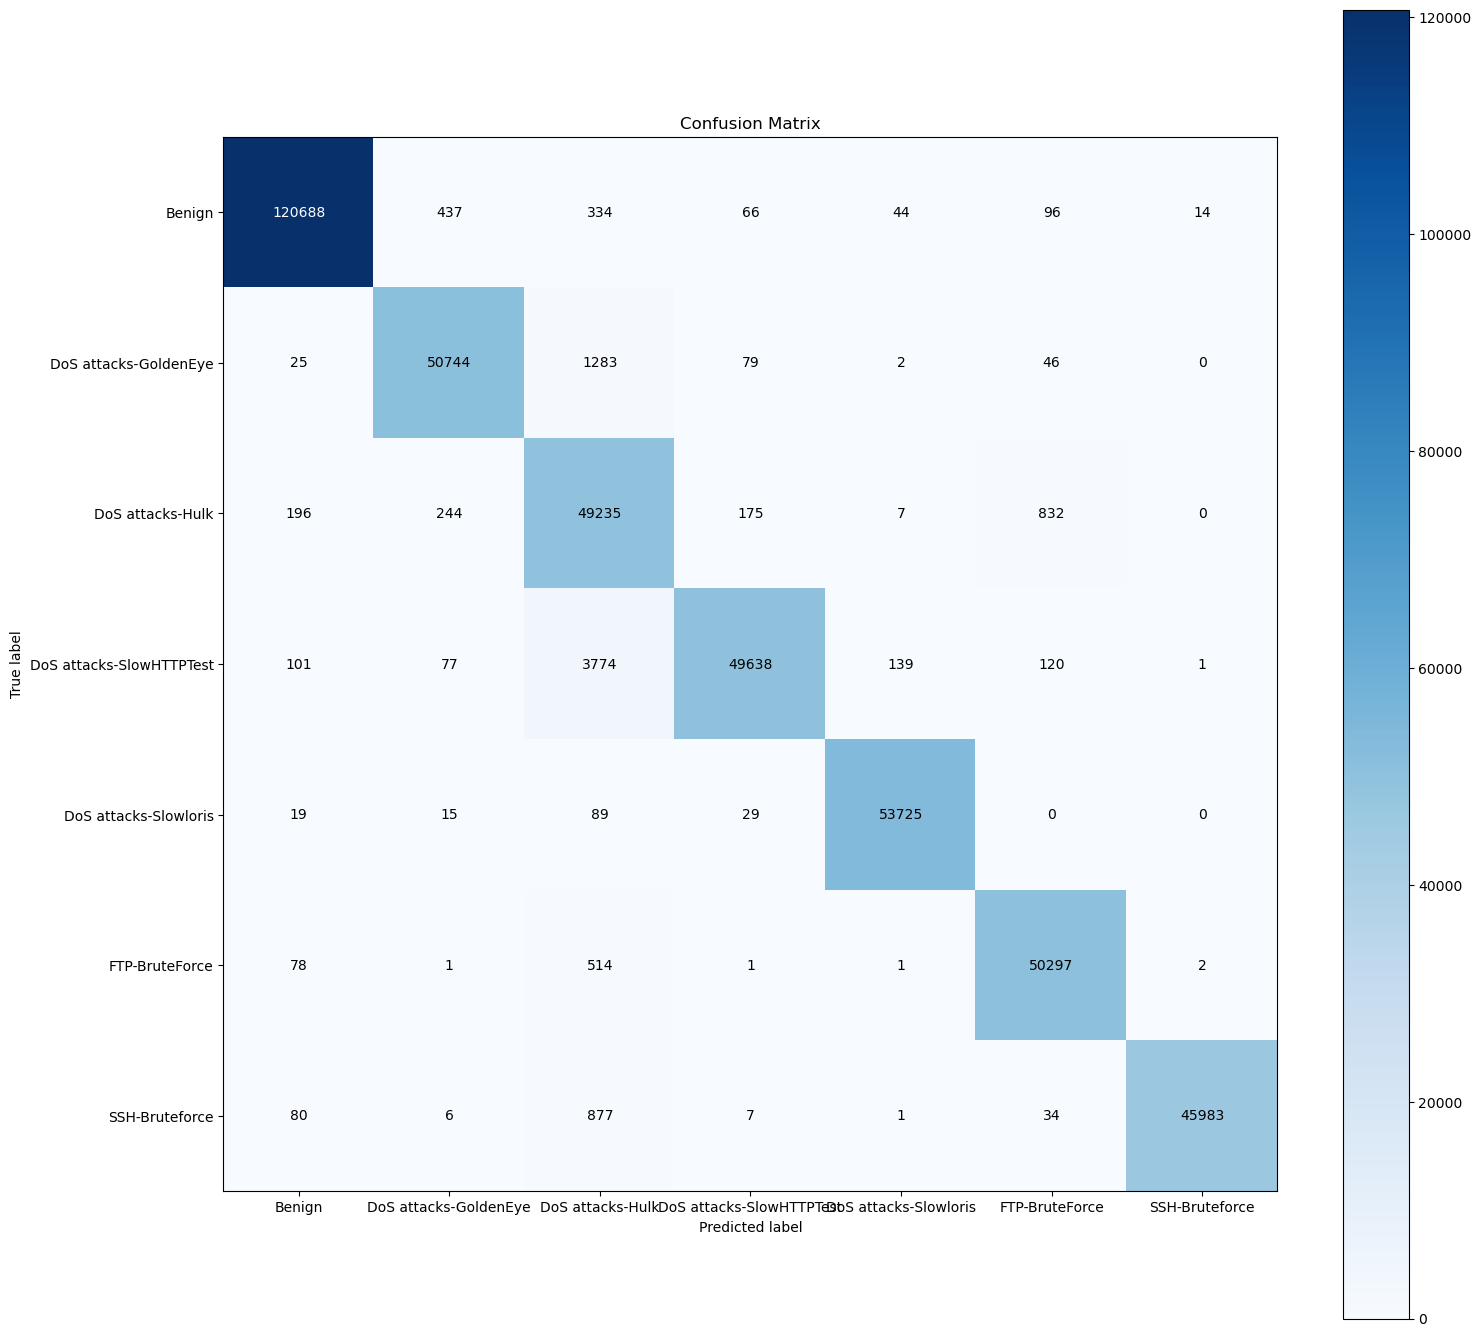

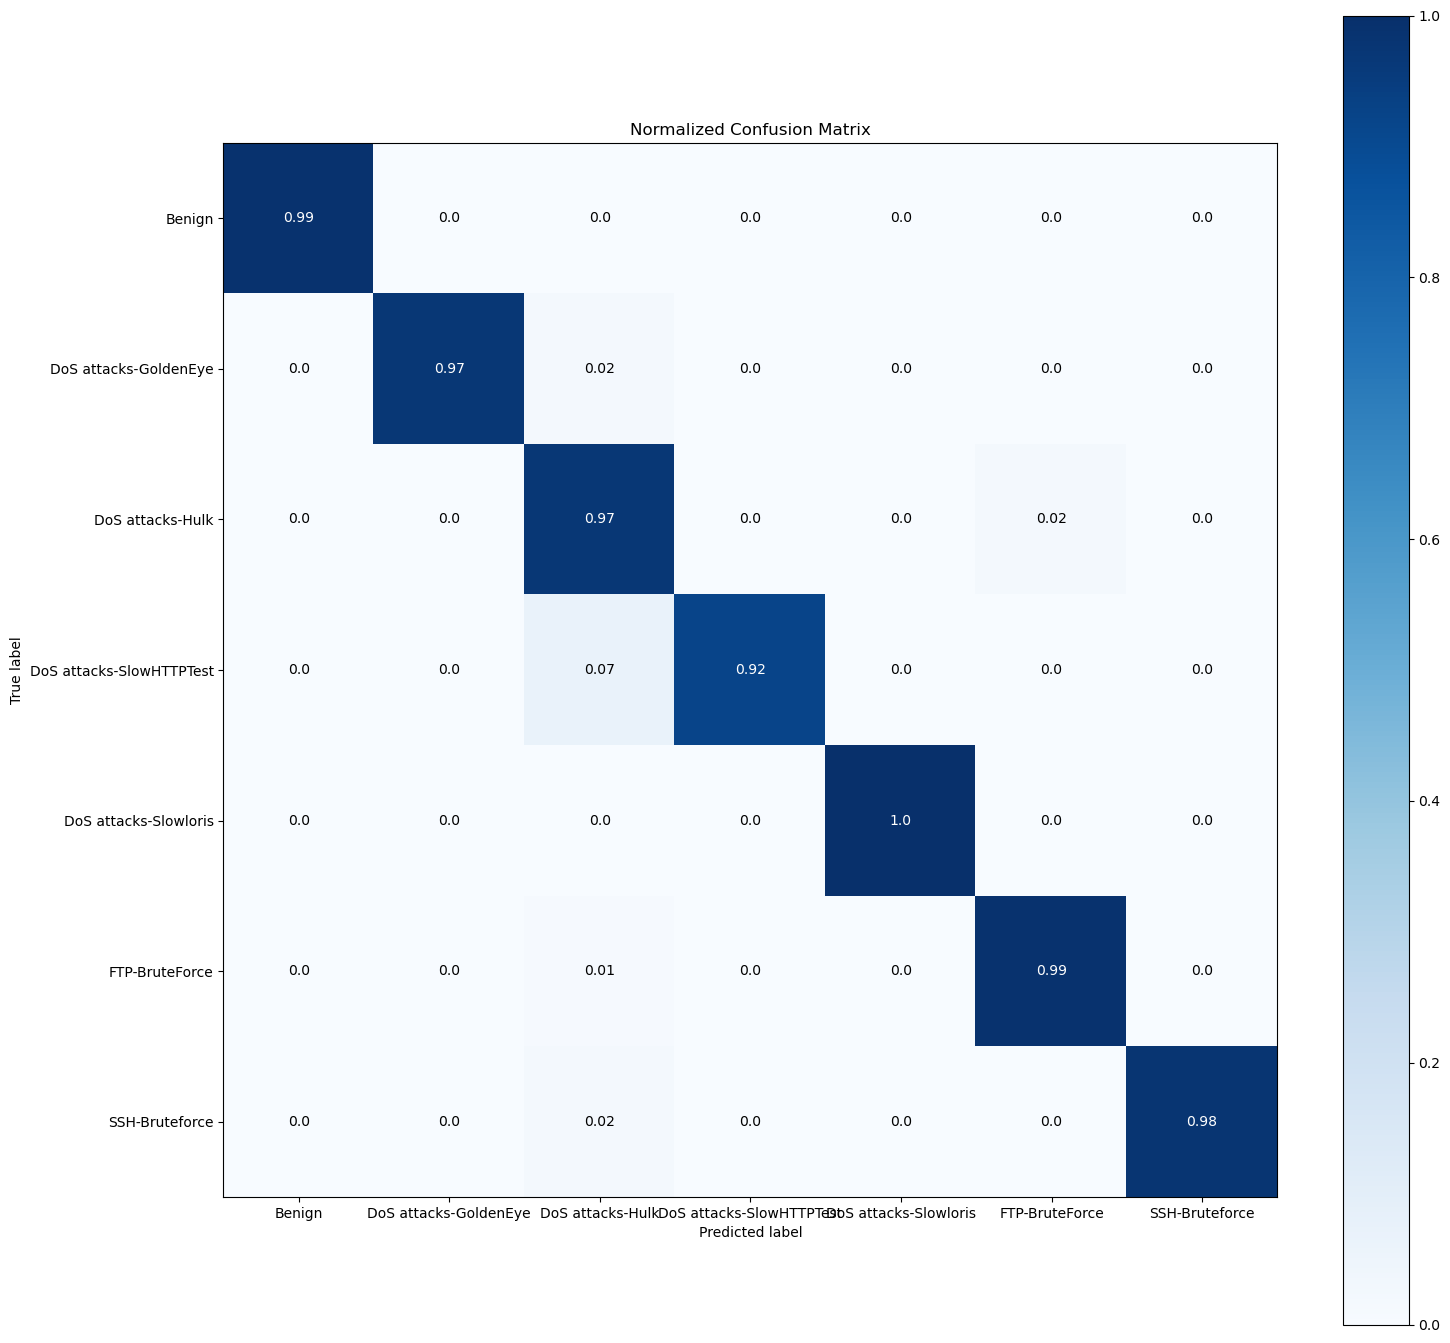

In [22]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (17,17))

In [23]:
# evaluate the model
X_testArr = X_test.to_numpy()

Y_pred=model.predict(X_testArr)

LabelsArr = np.array(Labels1)
Labels
LabelsArr

y_test1_text = []
for i in range(0, Y_test.size):
    for j in range(0, LabelsArr.size):
        if Y_test[i] == j:
            y_test1_text.append(Labels[j])

y_pred_text = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_pred_text.append(Labels[j])
            


In [24]:
print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

                          precision    recall  f1-score   support

                  Benign  0.98837429 0.97113396 0.97967828     32391
   DoS attacks-GoldenEye  0.93704552 0.93863500 0.93783959     10022
        DoS attacks-Hulk  0.86577475 0.96529200 0.91282902     10257
DoS attacks-SlowHTTPTest  0.97419852 0.91080108 0.94143369     11110
   DoS attacks-Slowloris  0.98926559 0.99549914 0.99237258     11109
          FTP-BruteForce  0.99723046 0.99900912 0.99811900     15138
          SSH-Bruteforce  0.99816054 0.99774342 0.99795193     11965

                accuracy                      0.97069378    101992
               macro avg  0.96429281 0.96830196 0.96574630    101992
            weighted avg  0.97201659 0.97069378 0.97094174    101992



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

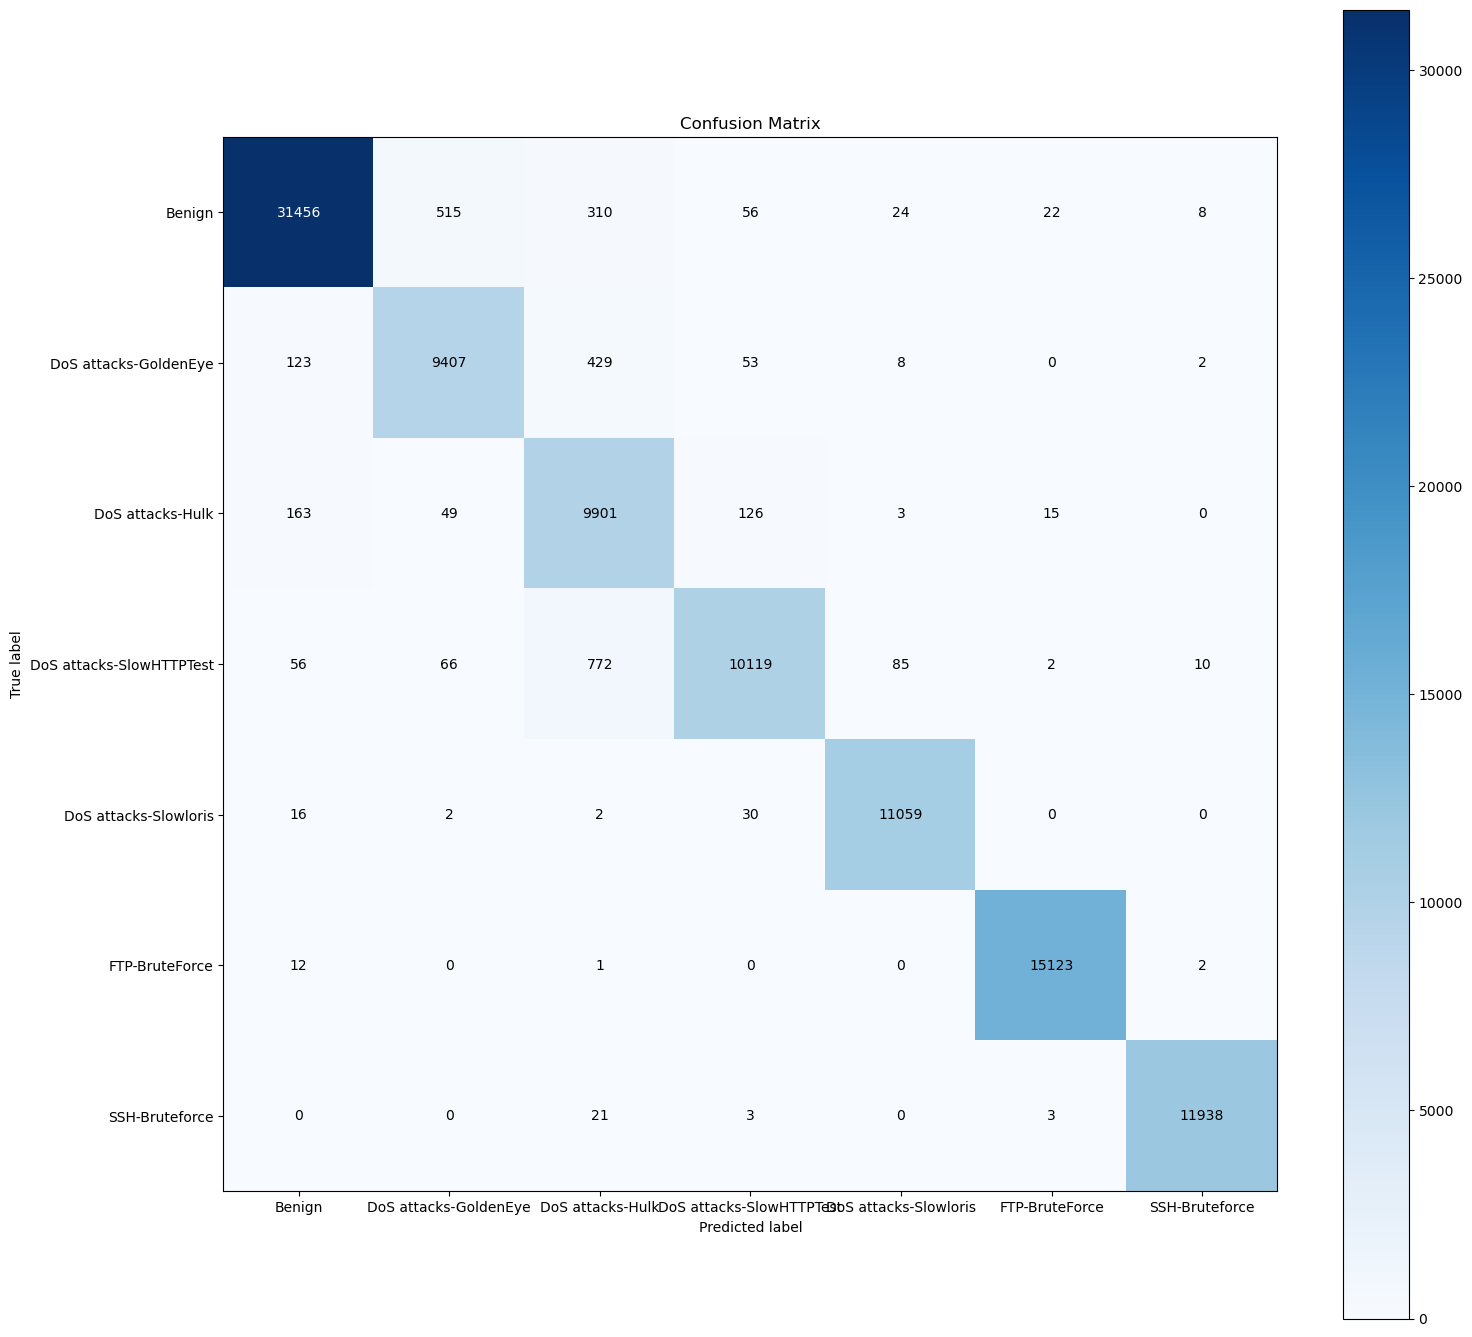

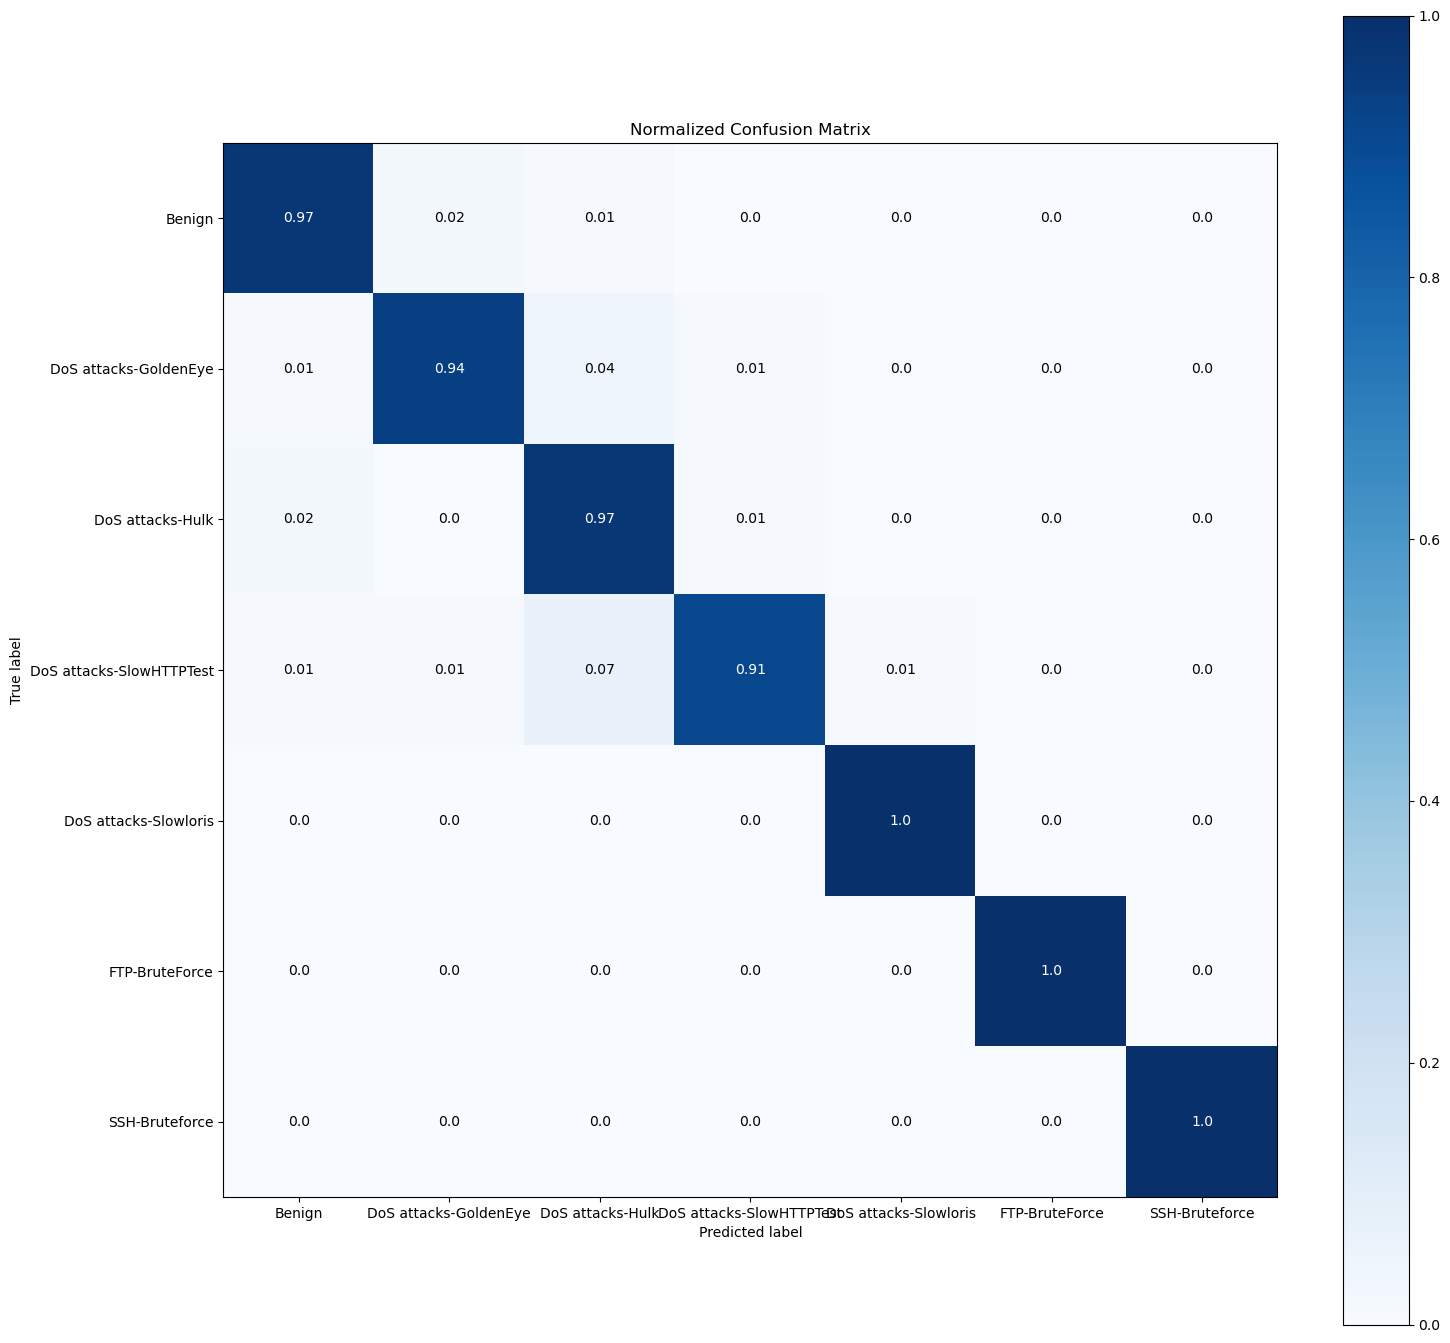

In [25]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (17,17))



In [26]:
size=200
data=shap.sample(X_trainArr, size)
explainer = shap.KernelExplainer(model.predict,data)
expected_value = explainer.expected_value
data1=shap.sample(X_testArr, size)
shap_values = explainer.shap_values(data1,nsamples=size)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [27]:
#np.savetxt('testV3.1.txt',shap_values)


#shap_values = np.loadtxt('testV3.1.txt')
print(shap_values.shape)

(200, 76)


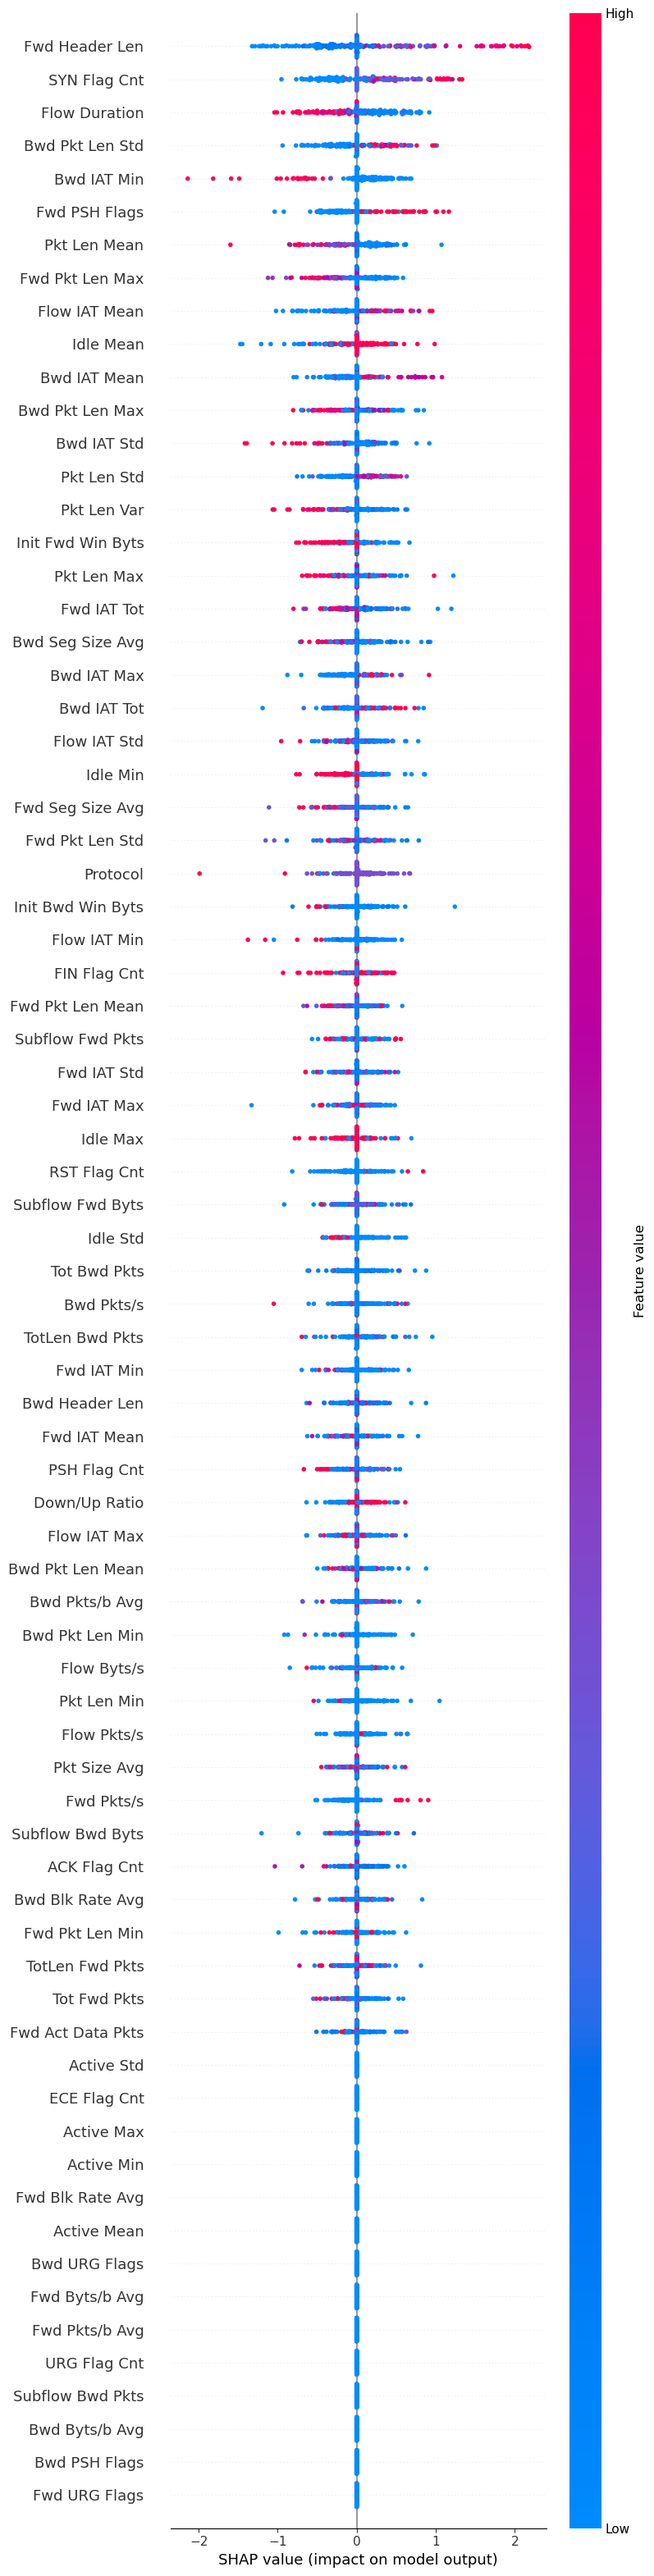

In [28]:
shap.summary_plot(shap_values,data1,feature_names=features, max_display=75)

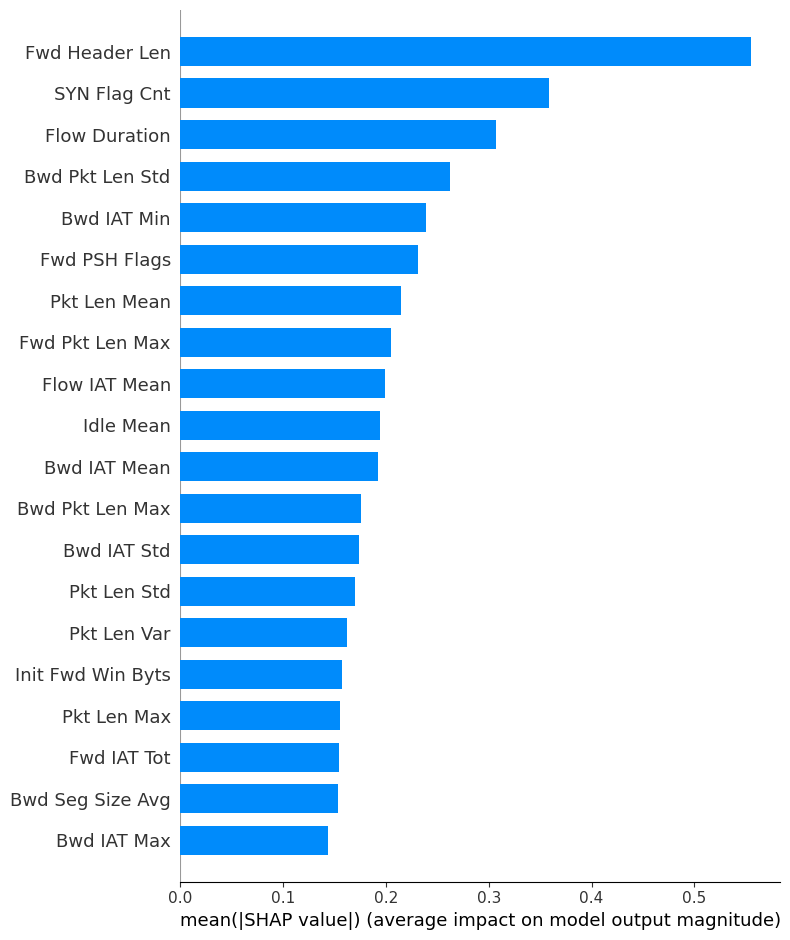

In [29]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = features)

count    430156.000000
mean          0.209505
std           0.406956
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Fwd PSH Flags, dtype: float64


(0.0, 2.0)

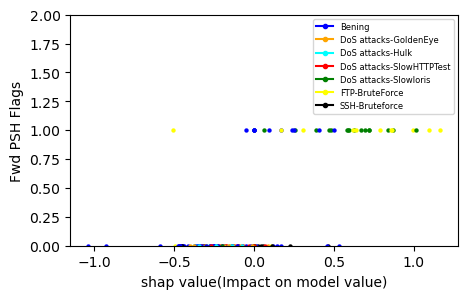

In [30]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#Fwd Seg Size Min,Bwd Pkt Len Std, Fwd Pkt Len Std,Fwd PSH flags,SYN Flag Cnt, Pkt Len Var
#caracteristica='Fwd Header Len'
caracteristica="Fwd PSH Flags"
pos=np.char.find(features,caracteristica, start=0, end=None)
pos =np.where(pos == 0)
pos = int(pos[0])
plt.rcParams["figure.figsize"] = (5,3)
y_preddata=model.predict(data1)

col =[]
x=shap_values[:,pos]
y= data1[:,pos]
for i in range(0, len(data1[:,pos])):
    if y_preddata[i]==0:
        col.append('blue')  
    elif y_preddata[i]==1:
        col.append('orange') 
    elif y_preddata[i]==2:
        col.append('cyan') 
    elif y_preddata[i]==3:
        col.append('red') 
    elif y_preddata[i]==4:
        col.append('green') 
    elif y_preddata[i]==5:
        col.append('yellow') 
    elif y_preddata[i]==6:
        col.append('black')
  

for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 10,linewidth = 0)

plt.ylabel(caracteristica) 
plt.xlabel('shap value(Impact on model value)') 
custom_lines = [Line2D([0], [0], marker='o', color='b',      label='Bening', markersize=3),
                Line2D([0], [0], marker='o', color='orange', label='DoS attacks-GoldenEye', markersize=3),
                Line2D([0], [0], marker='o', color='cyan',   label='DoS attacks-Hulk', markersize=3),
                Line2D([0], [0], marker='o', color='red',    label='DoS attacks-SlowHTTPTest', markersize=3),
                Line2D([0], [0], marker='o', color='green',  label='DoS attacks-Slowloris', markersize=3),
                Line2D([0], [0], marker='o', color='yellow', label='FTP-BruteForce', markersize=3),
                Line2D([0], [0], marker='o', color='black',  label='SSH-Bruteforce', markersize=3),
               ]


plt.legend(handles= custom_lines,loc="best", prop={'size': 6})
print(dataset[caracteristica].describe())
plt.ylim([0, 2])

(0.0, 1000.0)

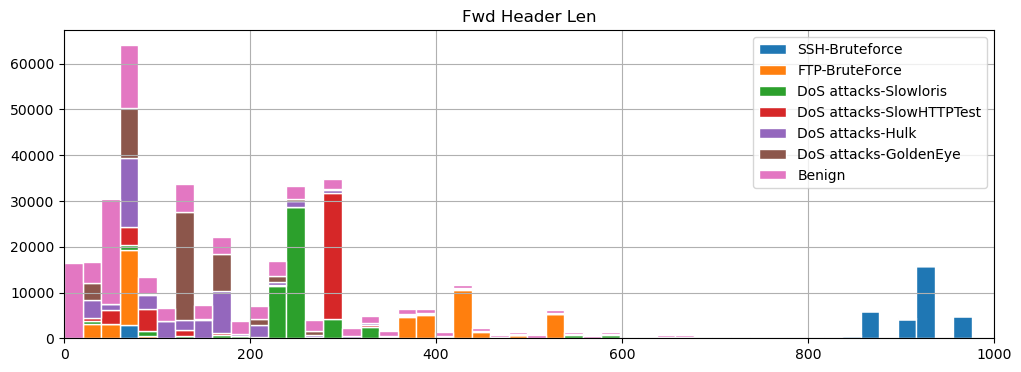

In [31]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce'

caracteris= 'Fwd Header Len'
#fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True,figsize=(12,4))
lim=1000
ylim=20000

pruebadf=dataset.loc[dataset[caracteris] < lim]
#brutedf=pruebadf.loc[pruebadf['Label'] == "SSH-Bruteforce"]
#Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


#pruebadf.hist(column=caracteris, ax = ax[0][0],bins = bin)
#brutedf.hist(column=caracteris, ax = ax[0][1],color="red",bins = bin)
#Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)

#fig , ax =plt.subplots(nrows=1, ncols=1,figsize=(12,4))

#ax[0].hist(pruebadf['Fwd Header Len'],
#          edgecolor='white',
#        bins=bin)

#ax[2].set_title(caracteris+ " en tráfico benigno")
plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'SSH-Bruteforce','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'FTP-BruteForce','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-SlowHTTPTest','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Hulk','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-GoldenEye','Fwd Header Len'],
     pruebadf.loc[pruebadf['Label'] == 'Benign','Fwd Header Len']],
    stacked=True,
    label=['SSH-Bruteforce', 'FTP-BruteForce', 'DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','DoS attacks-Hulk'
           ,'DoS attacks-GoldenEye','Benign'],
    edgecolor='white',
    bins = bin,
    )

plt.legend()
plt.grid()
plt.title(caracteris)
plt.xlim([0, lim])
#fig.savefig("Fwd_header_len.pdf")

count    4.301560e+05
mean     4.324194e+07
std      4.339625e+07
min      0.000000e+00
25%      3.016070e+06
50%      2.633886e+07
75%      9.010633e+07
max      1.200000e+08
Name: Flow Duration, dtype: float64


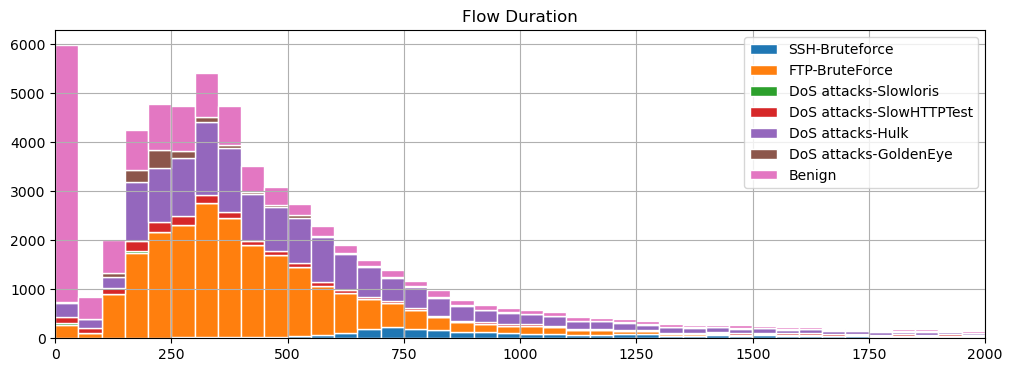

In [32]:
caracteris= 'Flow Duration'

lim=2000
pruebadf=dataset.loc[dataset[caracteris] < lim]
print(dataset[caracteris].describe())
bin = 40

plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'SSH-Bruteforce',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'FTP-BruteForce',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-SlowHTTPTest',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Hulk',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'DoS attacks-GoldenEye',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'Benign',caracteris]],
    stacked=True,
    label=['SSH-Bruteforce', 'FTP-BruteForce', 'DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','DoS attacks-Hulk'
           ,'DoS attacks-GoldenEye','Benign'],
    edgecolor='white',
    bins = bin,
    )

plt.legend()
plt.grid()
plt.title(caracteris)
plt.xlim([0, lim])
plt.savefig("Flow Duration2.pdf")

(0.0, 1000.0)

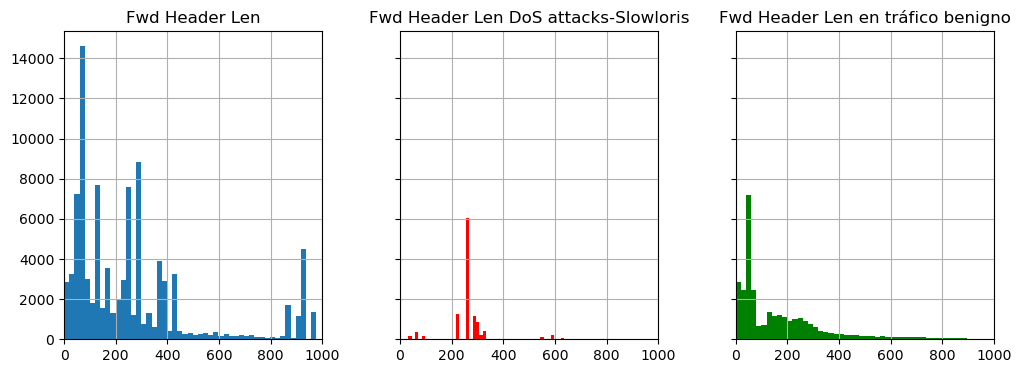

In [33]:
#Histograma del FWdSigSezSize

caracteris= 'Fwd Header Len'
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(12,4))
lim=1000

pruebadf=dataset1.loc[dataset1[caracteris] < lim]
evildf=pruebadf.loc[pruebadf['Label'] == 'DoS attacks-Slowloris']
Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


pruebadf.hist(column=caracteris, ax = ax[0],bins = bin)
evildf.hist(column=caracteris, ax = ax[1],color="red",bins = bin)
Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)


ax[0].set_title(caracteris )
ax[1].set_title( caracteris+" DoS attacks-Slowloris")
ax[2].set_title(caracteris+ " en tráfico benigno")

ax[0].set_xlim([0, lim])

ax[1].set_xlim([0, lim])

ax[2].set_xlim([0, lim])


In [34]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,data1,feature_names=features, out_names=Labels)
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce' FWD header Len 936, BWD packt Len STD 176, Fwd Pack Len std 166


In [35]:
y_preddata=model.predict(data1)


In [36]:
num=25;

shap.force_plot(explainer.expected_value, shap_values[num,:]  ,data1[num,:],feature_names=features, figsize=[15,28])
#1 maligno #0 benigno

In [37]:
#feature = [a + ": " + str(int(b)) for a,b in zip(features, data1[num].round(0))]

#shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[num],feature_names=feature, max_display=80)


FTP-BruteForce


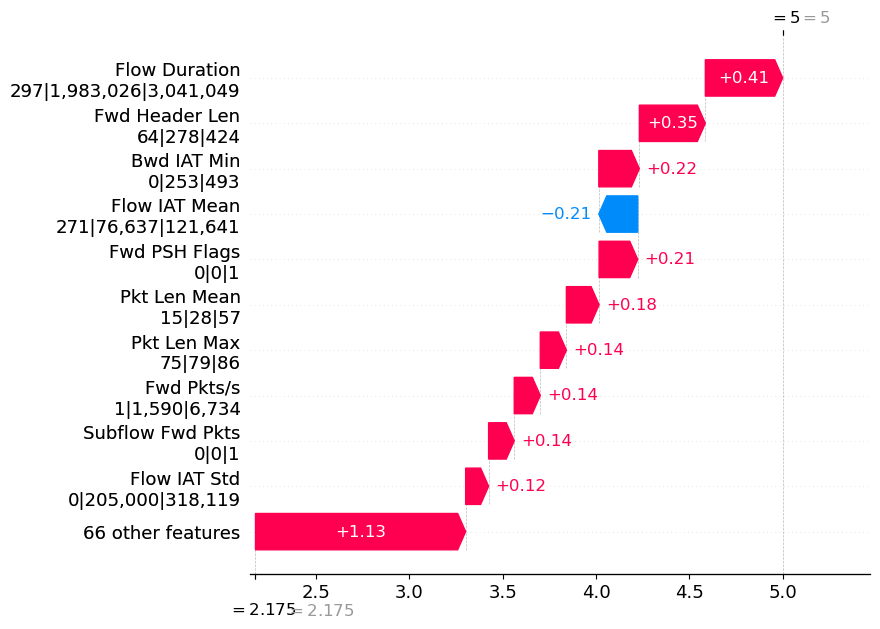

In [38]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce
nuevo_shap=shap_values[0]*0
nuevo_data = data1[0]*0
nuevo_min=data1[0]
nuevo_max=nuevo_data
nuevo_std=nuevo_data

acum=0
ata=5
margen=0.2
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        nuevo_shap=nuevo_shap+shap_values[i]
        nuevo_data=nuevo_data+data1[i]
        nuevo_min =np.minimum(nuevo_min,data1[i])
        nuevo_max =np.maximum(nuevo_max,data1[i])
        acum=acum+1
nuevo_shap=nuevo_shap/acum
nuevo_data=nuevo_data/acum
#Calculo del STD
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        
        nuevo_std= nuevo_std+((data1[i]-nuevo_data)**2)
       
nuevo_std = (nuevo_std/acum)**0.5

#print('{0:,}'.format(int(nuevo_max[1])))
#"|" + '{0:,}'.format(int(e)) 
feature = [a + "\n" + '{0:,}'.format(int(b)) +"|" +'{0:,}'.format(int(c)) +"|" +'{0:,}'.format(int(d))
           for a,b,c,d in zip(features,nuevo_min,nuevo_data,nuevo_max)]
print(Labels[ata])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, nuevo_shap,feature_names=feature, max_display=11)

#shap.summary_plot(shap_values, data1, plot_type="bar", class_names= Labels1, feature_names = features)
#Revisar que significa el explainer expecteed value

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree


In [40]:
#clf = tree.DecisionTreeClassifier(random_state=0)
n_estimators=200

clf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,max_depth=6)
#    max_features
inicio = time.time()
clf = clf.fit(X_trainArr,Y_train)
fin = time.time()
tiempo_random = fin-inicio
print(tiempo_random)

160.54632306098938


In [41]:
X_testArr = X_test.to_numpy()
Y_pred=clf.predict(X_trainArr)
LabelsArr = np.array(Labels)

y_testree1 = []
for i in range(0, Y_train.size):
    for j in range(0, LabelsArr.size):
        if Y_train[i] == j:
            y_testree1.append(Labels[j])

y_predtree1 = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_predtree1.append(Labels[j])

In [42]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))
accuracy_modelo=accuracy_score(Y_train, Y_pred)
print(accuracy_modelo)
# 0.91882740 max 5

                          precision    recall  f1-score   support

                  Benign  0.94570261 0.98322636 0.96409951    121679
   DoS attacks-GoldenEye  0.99536020 0.85927289 0.92232371     52179
        DoS attacks-Hulk  0.73822465 0.97800312 0.84136386     50689
DoS attacks-SlowHTTPTest  0.99526189 0.78404828 0.87711900     53850
   DoS attacks-Slowloris  1.00000000 0.96532843 0.98235839     53877
          FTP-BruteForce  0.89878390 0.93956066 0.91872004     50894
          SSH-Bruteforce  1.00000000 0.93251468 0.96507902     46988

                accuracy                      0.92969295    430156
               macro avg  0.93904761 0.92027920 0.92443764    430156
            weighted avg  0.94066217 0.92969295 0.93070499    430156

0.9296929486046922


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

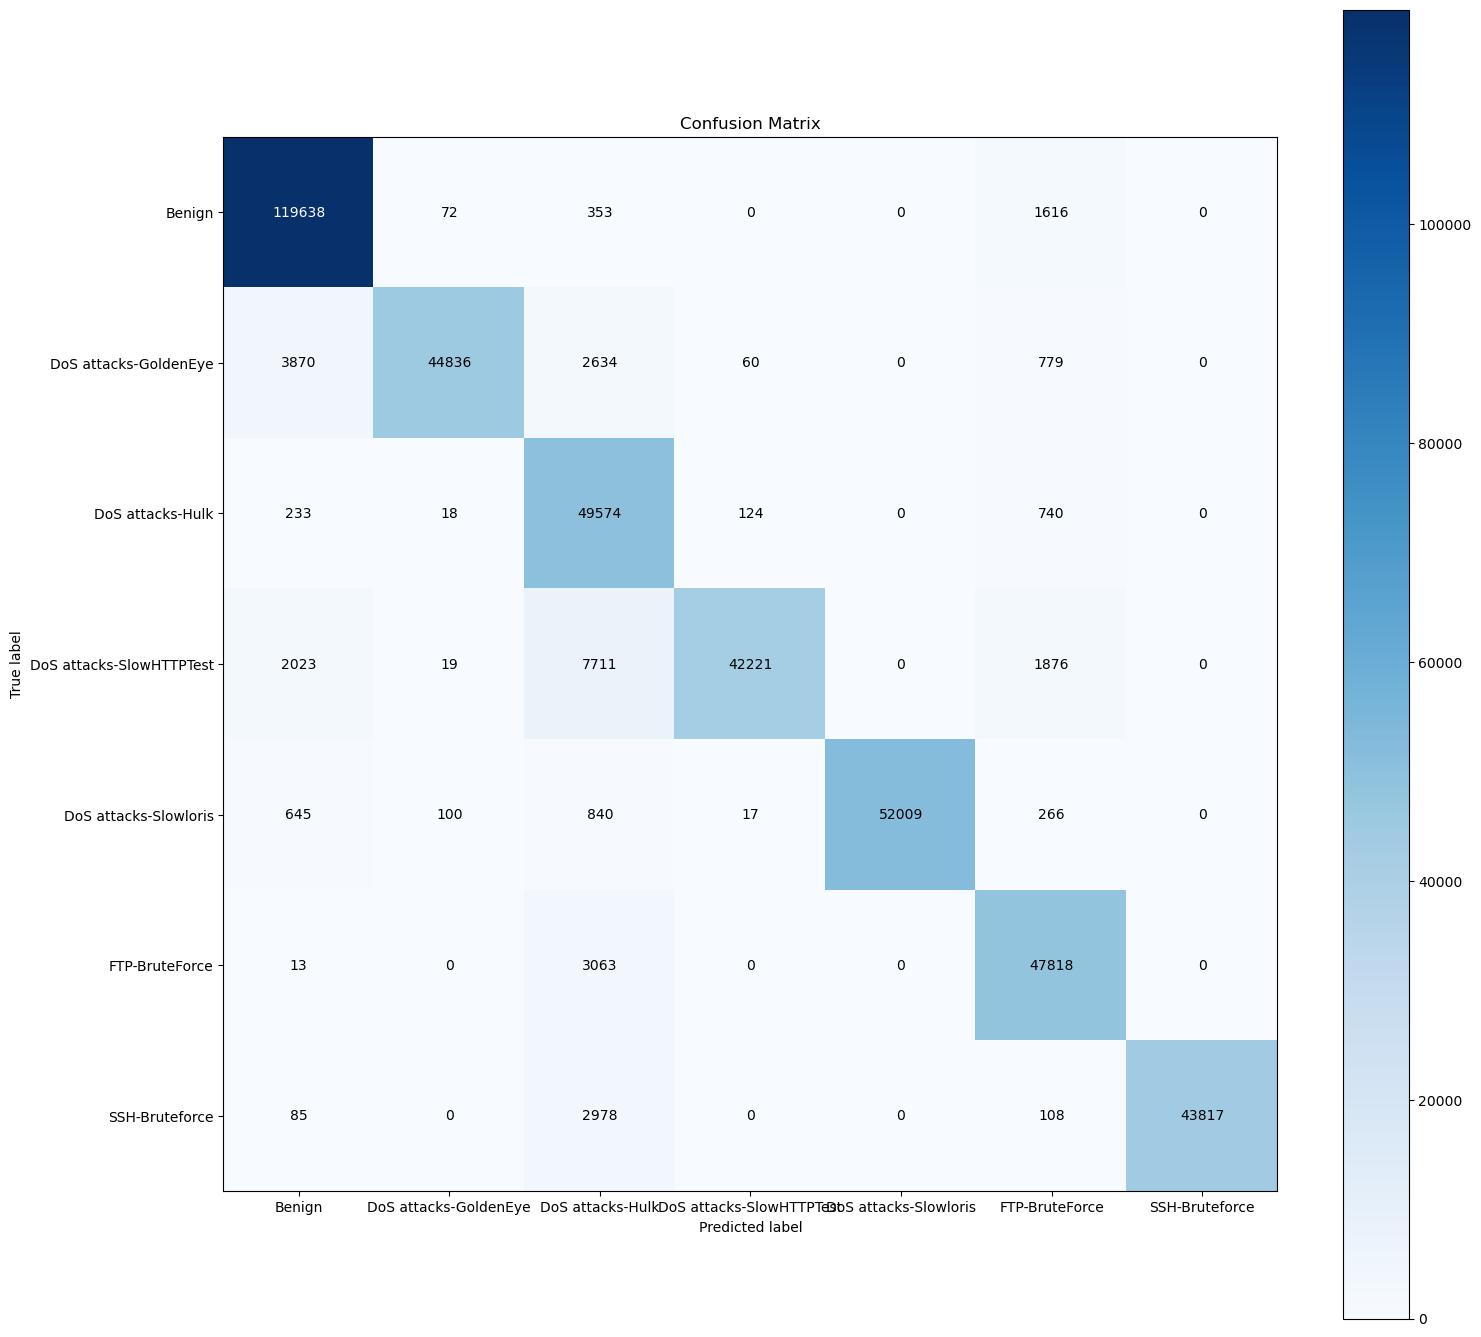

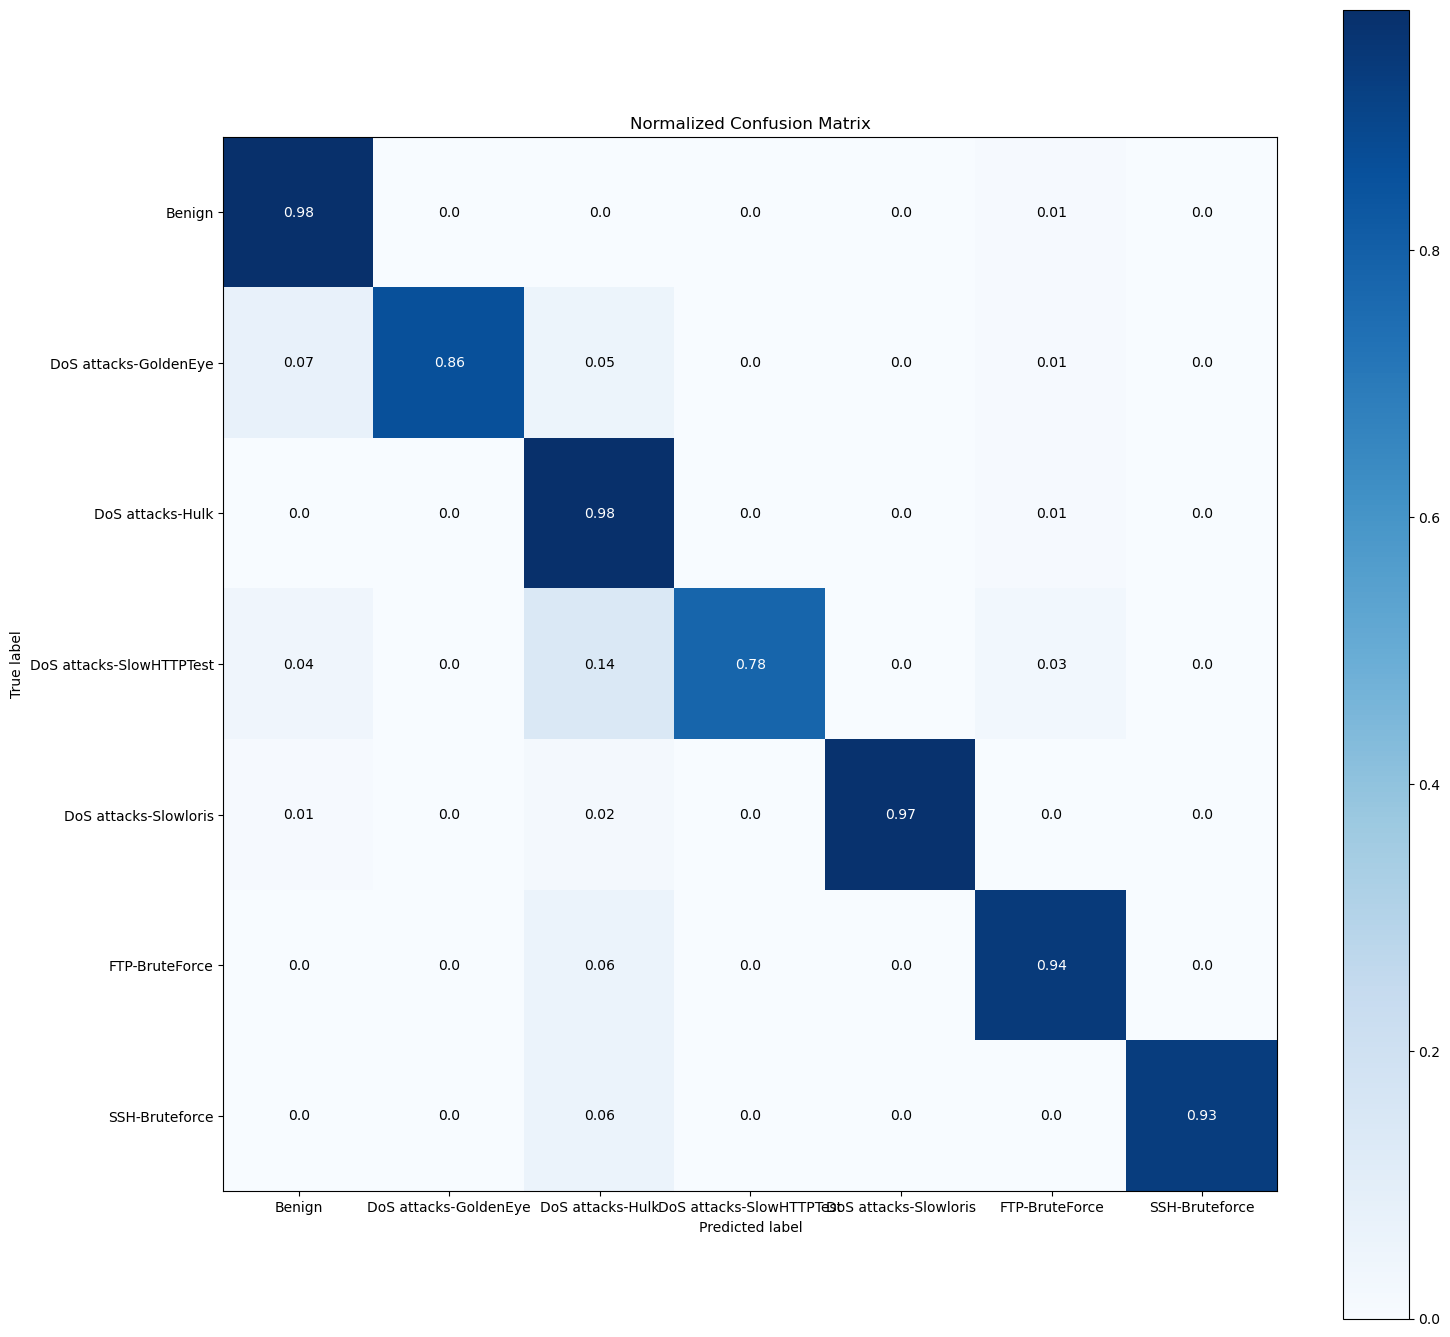

In [43]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1,figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True,figsize= (17,17))

In [44]:
X_testArr = X_test.to_numpy()
Y_pred=clf.predict(X_testArr)
LabelsArr = np.array(Labels1)

y_testree1 = []
for i in range(0, Y_test.size):
    for j in range(0, LabelsArr.size):
        if Y_test[i] == j:
            y_testree1.append(Labels[j])

y_predtree1 = []
for i in range(0, Y_pred.size):
    for j in range(0, LabelsArr.size):
        if Y_pred[i] == j:
            y_predtree1.append(Labels[j])

In [45]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))


                          precision    recall  f1-score   support

                  Benign  0.93891999 0.97857430 0.95833711     32391
   DoS attacks-GoldenEye  0.99525518 0.85811215 0.92160960     10022
        DoS attacks-Hulk  0.74196986 0.95037535 0.83334046     10257
DoS attacks-SlowHTTPTest  0.99548560 0.73438344 0.84522946     11110
   DoS attacks-Slowloris  0.98328770 0.93743811 0.95981567     11109
          FTP-BruteForce  0.94954763 0.99834853 0.97333677     15138
          SSH-Bruteforce  0.99991490 0.98203092 0.99089222     11965

                accuracy                      0.93616166    101992
               macro avg  0.94348298 0.91989469 0.92608019    101992
            weighted avg  0.94437614 0.93616166 0.93604333    101992



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

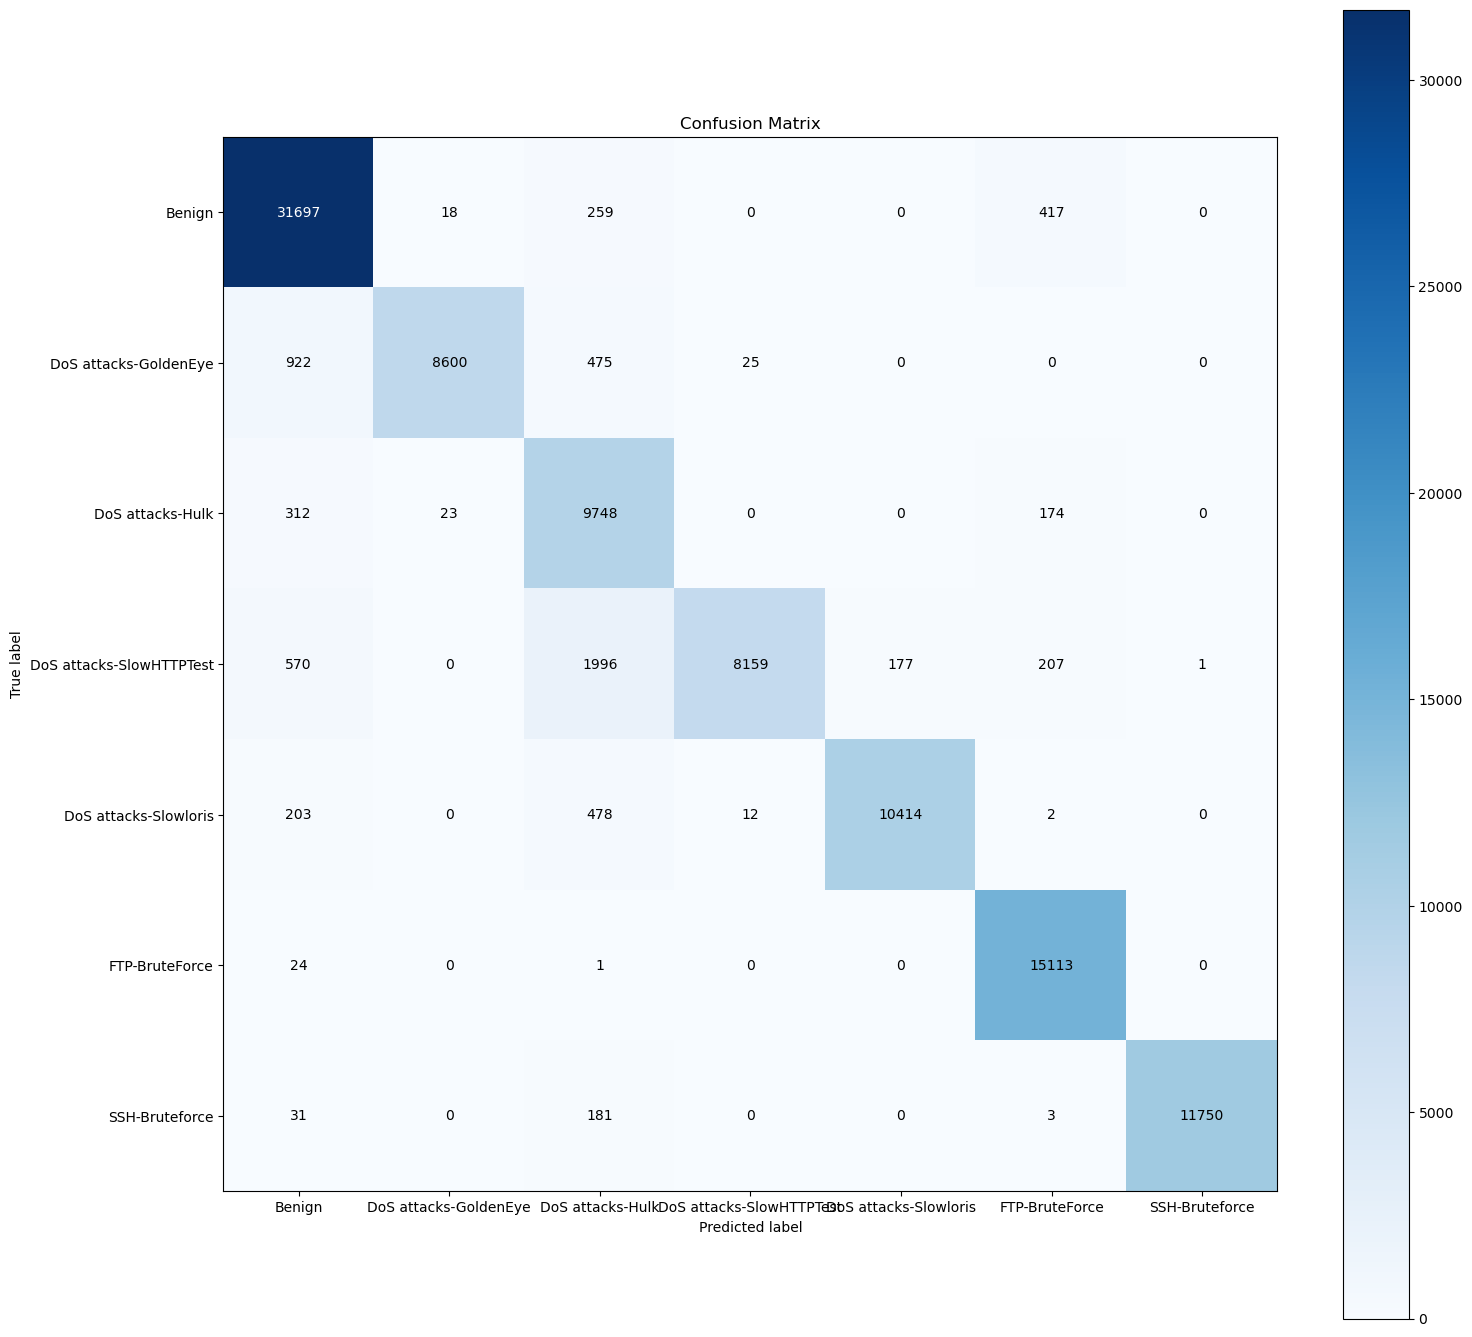

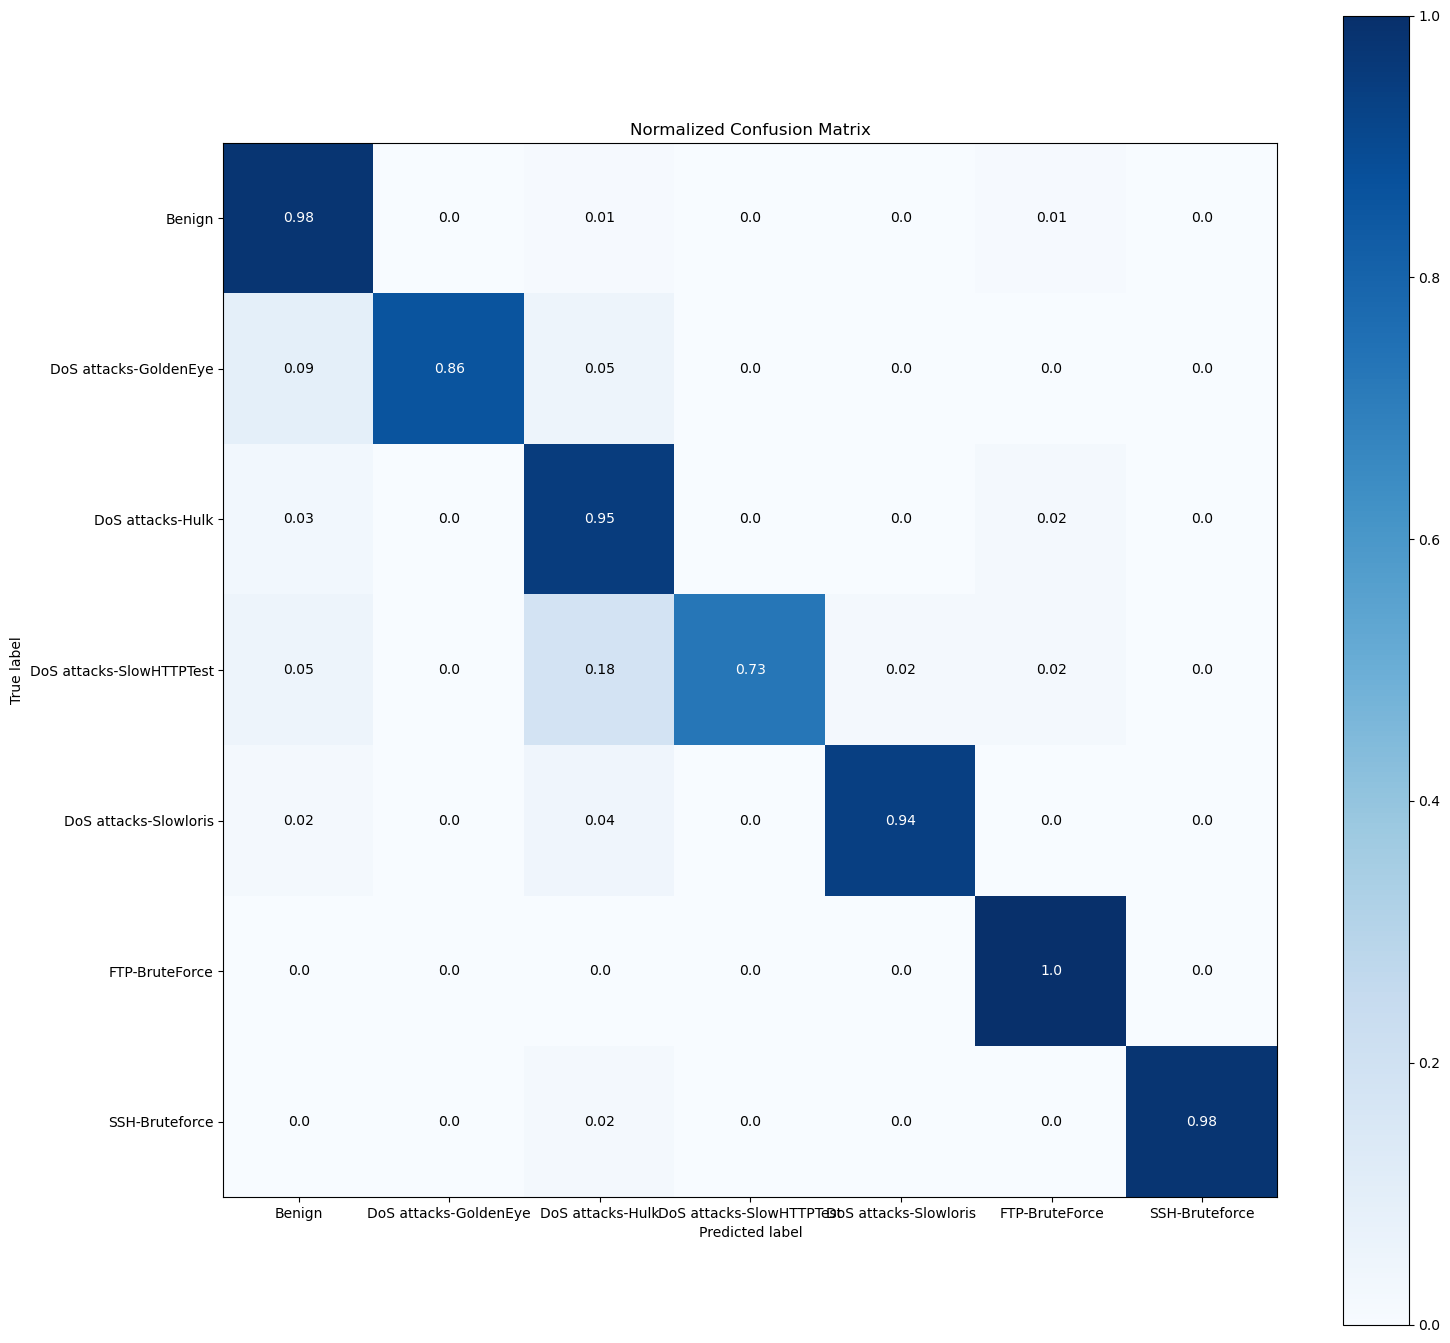

In [46]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1,figsize= (17,17))
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True,figsize= (17,17))

41.07549571990967


Text(0.5, 0.98, 'Arbol numero: 197 Precision test: 0.925 Precision entrenamiento: 0.901')

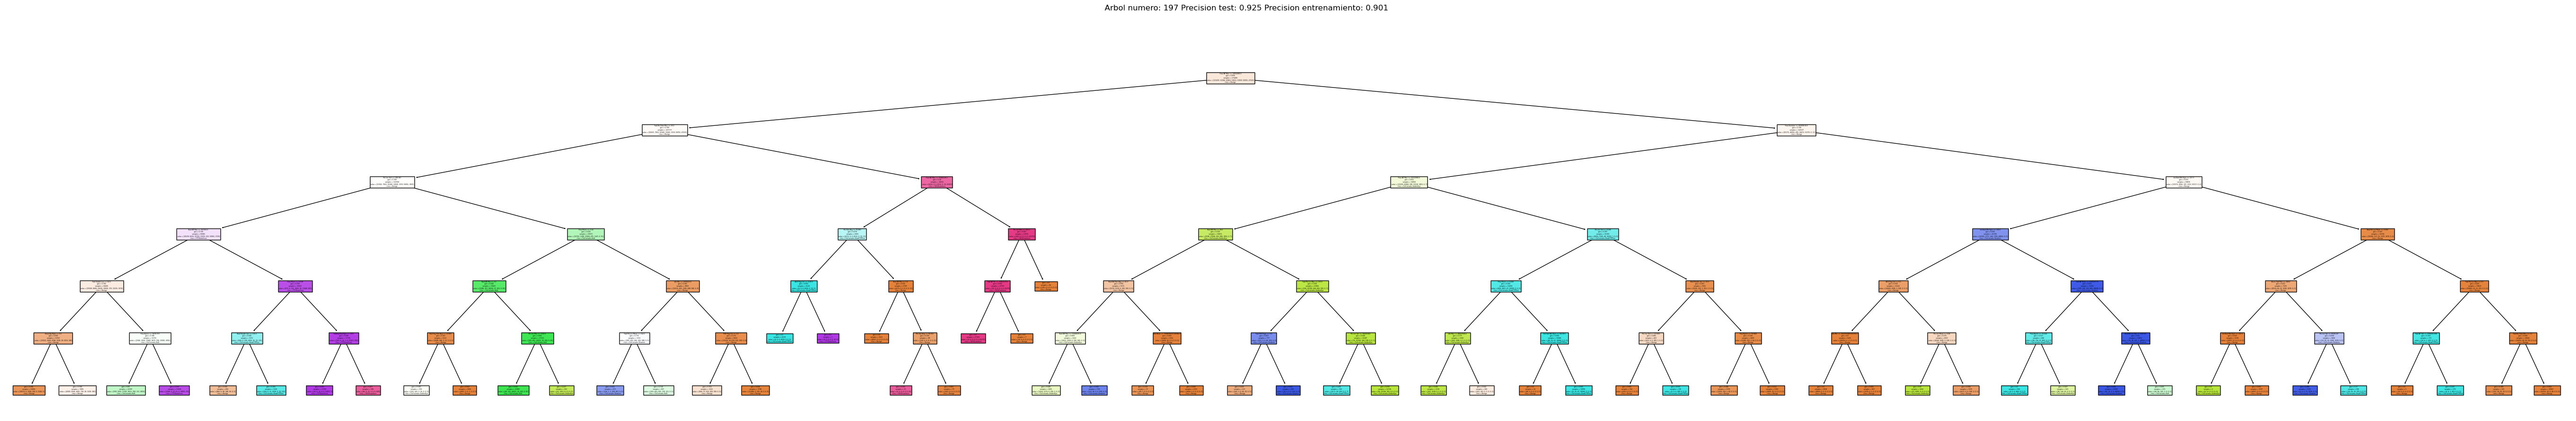

In [47]:
from matplotlib.backends.backend_pdf import PdfPages
accuracy_ant=0
accuracy_med=0
accuracy_pon=0
accuracy_pon_ant=0
best=0
dist_ant=1000

import time
inicio = time.time()


from tqdm import tqdm
for i in range(n_estimators):
    aux_clf = clf.estimators_[i]
    y_pred_train=aux_clf.predict(X_trainArr)
    y_pred_test=aux_clf.predict(X_testArr)
    accuracy=accuracy_score(Y_test, y_pred_test)
    
    accuracy_train=accuracy_score(Y_train, y_pred_train)
    accuracy_pon = accuracy_train*accuracy
    
    dist=abs(accuracy_modelo-accuracy)
    
    if accuracy_pon > accuracy_pon_ant:
        pon=i
        accuracy_pon_ant=accuracy_pon
        accuracy_pon_train = accuracy_train
        accuracy_pon_test = accuracy

fin = time.time()
tiempo_extra=fin-inicio
print(tiempo_extra)

fig3 = plt.figure(figsize=(70,10))
_ = tree.plot_tree(clf.estimators_[pon], feature_names=features,  class_names=Labels,filled=True)



fig3.suptitle('Arbol numero: '+str(pon)+' Precision test: '+ str(round(accuracy_pon_test,3)) +' Precision entrenamiento: '+ str(round(accuracy_pon_train,3)))
#fig3.savefig("decistion_ataques_pon.pdf")

In [48]:
nuevo_tree = clf.estimators_[pon]
#    max_features




In [49]:
Y_pred_test=nuevo_tree.predict(X_trainArr)
accuracy=accuracy_score(Y_train, Y_pred_test)
print("precision entrenamiento",accuracy)
y_pred_test=nuevo_tree.predict(X_testArr)
accuracy=accuracy_score(Y_test, y_pred_test)
print("precision test",accuracy)

precision entrenamiento 0.9008661973795553
precision test 0.9245725154914111


In [50]:
dataset0 = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset01 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos

dataset0.replace([np.inf, -np.inf], -1, inplace=True) 
dataset0.replace([np.nan, -np.nan], -1, inplace=True)

dataset01.replace([np.inf, -np.inf], -1, inplace=True) 
dataset01.replace([np.nan, -np.nan], -1, inplace=True)

dataset0 = dataset0.drop(dataset0[dataset0['Dst Port']=='Dst Port'].index)
dataset01 = dataset01.drop(dataset01[dataset01['Dst Port']=='Dst Port'].index)

#Eliminamos las columnas innecesarias

dataset0 = dataset0.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port'], axis=1)
dataset01 = dataset01.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset01 = dataset01.drop(['Timestamp'], axis=1)
dataset0 = dataset0.drop(['Timestamp'], axis=1)

X_train0=dataset0.iloc[:, 0:77] #Luego obtenemos las características del flujo
X_test0=dataset01.iloc[:, 0:77]



#for col in X_train0.columns:
#    if X_train0[col].var() == 0:
#        print(col)
#        X_train0=X_train0.drop(col, axis =1)
#        X_test0=X_test0.drop(col, axis =1)
        
X_trainArr0=X_train0.to_numpy()
X_testArr0=X_test0.to_numpy()

X_tiempo=np.concatenate((X_trainArr0, X_testArr0), axis=0)

print(X_tiempo.shape)

(532148, 77)


In [51]:
import time
inicio = time.time()
y_pred=nuevo_tree.predict(X_tiempo)
fin = time.time()

print(fin-inicio)

ValueError: X has 77 features, but DecisionTreeClassifier is expecting 76 features as input.